In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [57]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [58]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [59]:
df.shape

(51717, 17)

In [60]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [61]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [62]:
for feature in feature_na:
    print(' {} has {} missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

 rate has 15.0337 missing values
 phone has 2.3358 missing values
 location has 0.0406 missing values
 rest_type has 0.4389 missing values
 dish_liked has 54.2916 missing values
 cuisines has 0.087 missing values
 approx_cost(for two people) has 0.669 missing values


### Calculate the average rating for each restaurant

In [63]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [64]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [65]:
df.shape

(43942, 17)

In [66]:
def split(x):
    return x.split('/')[0]

In [67]:
df['rate'] = df['rate'].apply(split)

In [68]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [69]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [70]:
df.replace('NEW',0,inplace=True)

In [71]:
df.replace('-',0,inplace=True)

In [72]:
df['rate'].dtype

dtype('O')

In [73]:
df['rate'] = df['rate'].astype(float)

In [74]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [75]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate

,name,rate
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
7157,i-Bar - The Park Bangalore,3.800000
7158,iFruit Live Ice Creams,3.400000
7159,iSpice Resto Cafe,3.700000
7160,nu.tree,4.314286


In [76]:
df_rate.columns = ['restaurant', 'avg_rating']
df_rate

,restaurant,avg_rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
7157,i-Bar - The Park Bangalore,3.800000
7158,iFruit Live Ice Creams,3.400000
7159,iSpice Resto Cafe,3.700000
7160,nu.tree,4.314286


### Finding the distribution of the average ratings column

C:\Users\molly\Desktop\GeospatialAnalysisProject\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='avg_rating', ylabel='Density'>

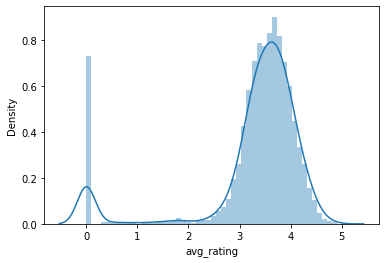

In [77]:
sns.distplot(df_rate['avg_rating'])

### Determining the most popular restaurants in Bangalore

In [78]:
df_rate.shape

(7162, 2)

In [79]:
chains = df['name'].value_counts()[0:20]
chains

Cafe Coffee Day        89
Onesta                 85
Empire Restaurant      71
Just Bake              68
Five Star Chicken      68
Kanti Sweets           68
Petoo                  64
Baskin Robbins         63
Pizza Hut              62
Polar Bear             61
Sweet Truth            60
Domino's Pizza         60
KFC                    60
Beijing Bites          60
McDonald's             59
Smoor                  59
Subway                 59
Faasos                 57
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

Text(0.5, 0, 'Number of restaurants')

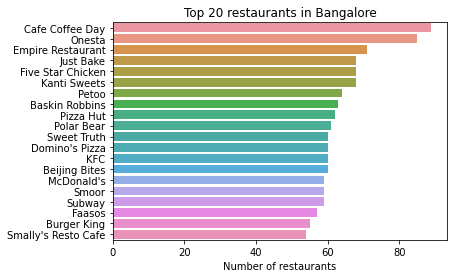

In [80]:
sns.barplot(x=chains,y=chains.index)
plt.title('Top 20 restaurants in Bangalore')
plt.xlabel('Number of restaurants')

### Determining how many restaurants do not accept online orders

In [81]:
x = df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [82]:
labels=['Accepted', 'Not accepted']

In [83]:
import plotly.express as px

In [84]:
px.pie(df,values=x,names=labels,title='Percentage of restaurants that accept online orders')

### Discovering how many restaurants provide tables

In [85]:
x = df['book_table'].value_counts()
x

No     37509
Yes     6433
Name: book_table, dtype: int64

In [86]:
labels = ['not book', 'book']

In [87]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [88]:
trace = go.Pie(labels=labels,values=x,hoverinfo='label + percent',textinfo='value',title='Restaurants that provide tables')
iplot([trace])

### In-depth analysis of restaurants

In [90]:
df['rest_type'].isna().sum()

151

In [107]:
df.dropna(how='any',inplace=True,subset=['rest_type'])

In [108]:
df['rest_type'].isna().sum()

0

In [110]:
len(df['rest_type'].unique())

87

In [125]:
trace1 = go.Bar(x=df['rest_type'].value_counts().nlargest(20).index,
       y=df['rest_type'].value_counts().nlargest(20)
      )

#### The graph below represents the top 20 restaurants in Bangalore by the number of establishments

In [126]:
iplot([trace1])

### Determine the highest voted restaurant

<AxesSubplot:xlabel='name'>

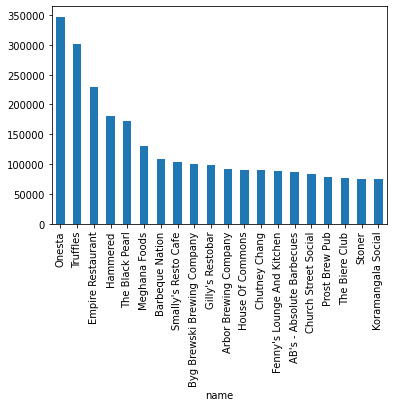

In [127]:
df.groupby('name')['votes'].sum().nlargest(20).plot.bar()

In [128]:
trace2 = go.Bar(x=df.groupby('name')['votes'].sum().nlargest(20).index,
      y=df.groupby('name')['votes'].sum().nlargest(20))

In [129]:
iplot([trace2])

### Calculate the total amount of restaurants per location in Bangalore

In [130]:
restaurant = []
location = []
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [131]:
df_total = pd.DataFrame(zip(location,restaurant))
df_total.head()

,0,1
0,BTM,578
1,Banashankari,238
2,Banaswadi,150
3,Bannerghatta Road,361
4,Basavanagudi,195


In [133]:
df_total.columns = ['location','restaurant']
df_total.head()

,location,restaurant
0,BTM,578
1,Banashankari,238
2,Banaswadi,150
3,Bannerghatta Road,361
4,Basavanagudi,195


In [134]:
df_total.set_index('location',inplace=True)

In [135]:
df_total.head()

,restaurant
location,
BTM,578
Banashankari,238
Banaswadi,150
Bannerghatta Road,361
Basavanagudi,195


In [136]:
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,281
Jayanagar,310
Bannerghatta Road,361
JP Nagar,398
Indiranagar,466
Electronic City,515
Marathahalli,520
HSR,551
BTM,578


#### The bar graph below shows the top 10 locations with the most restaurants

<AxesSubplot:xlabel='location'>

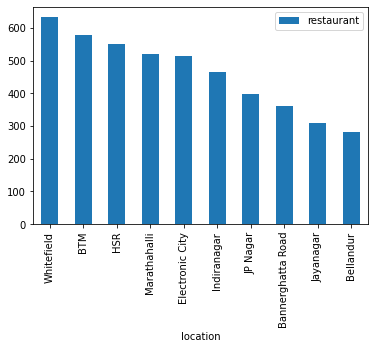

In [145]:
df_total.sort_values(by='restaurant').tail(10).sort_values('restaurant',ascending=False).plot.bar()